# More complex polynomial regressions

Someone once said that all regression algorithms finally boil down to least squares - its usually true.

The linear regression we tried earlier was a simple least square approach. We didn't get a very good fit with that. We then tried a pre-processor that extracted the polynomial features of teh input data - basically transformed the single feature into polynomial features up to 6th degree polynomial, and the did a linear regression (simple least squares) of these features - and it gave a lot better result!

A continued and further refined approach that comes next is Ridge regression, or the one we will use, Kernel Ridge regression.

Ridge regression is basically polynomial linear regression with additional penalties on the coefficients of each feature. You can read more about it here - https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Let's try the Kernel Ridge regression, which is Ridge regression with the kernel trick to speed it up.

/Users/hari/python/py2/pycon/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.55605152968e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


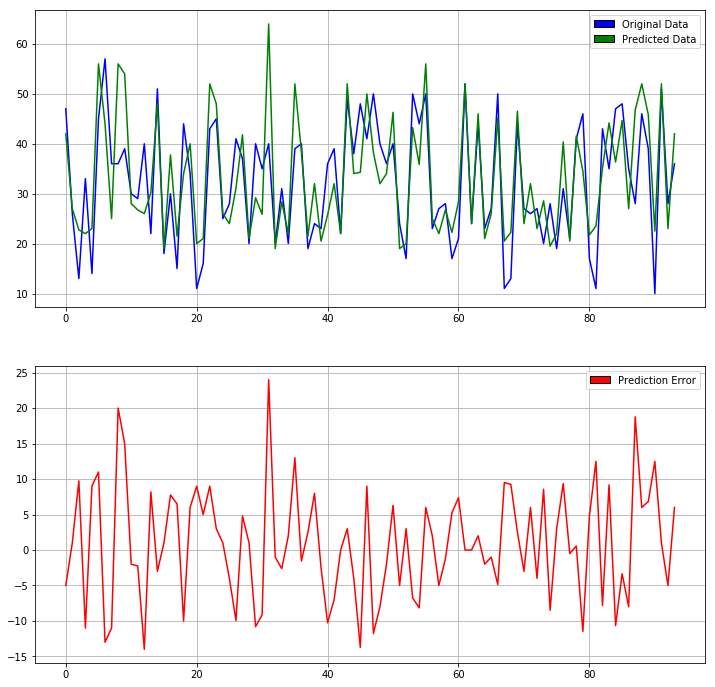

In [15]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
import numpy as np
from sgtaxidata import *

DBNAME="../taxis.db"
DATE="20170627"
LOC="Sengkang"

lat,lon=utils.get_lat_long(LOC)

df=taxis.getdf_loc_date(DBNAME,DATE,lat,lon)

X = np.array(df['Point'])
y = np.array(df['TaxiCount'])
X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = KernelRidge(alpha=0.5,kernel='poly')
model.fit(X_train, y_train)

visualize.plot_model(X_test,y_test,model)

The results look similar to the polynomial regression. Lets look at the scores.

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

print "Score for test data : ",model.score(X_test,y_test)
print "Score for training data : ",model.score(X_train,y_train)

print "Mean absolute error of prediction : ",mean_absolute_error(y_test,model.predict(X_test))
print "Mean square error of prediction : ",mean_squared_error(y_test,model.predict(X_test))
print "Mean square deviation of prediction : ",math.sqrt(mean_squared_error(y_test,model.predict(X_test)))

Score for test data :  0.541281976917
Score for training data :  0.545879065466
Mean absolute error of prediction :  6.52724372707
Mean square error of prediction :  64.4362805996
Mean square deviation of prediction :  8.02722122528


The parameter alpha is a flot value which determines how much we feel the training values are far away from the actual values. Depending on the value of alpha, the result can greatly vary.

Lets find this out using a more formal way of searching for the best parameters.

In [17]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KernelRidge(kernel="poly"), param_grid={"alpha": [1e0, 0.1,0.5,1e-2, 1e-3]}, cv=5)
clf.fit(X_train, y_train)
print clf.best_estimator_
print clf.score(X_test,y_test)
    

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='poly',
      kernel_params=None)
0.656517565223


/Users/hari/python/py2/pycon/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.92124197819e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/hari/python/py2/pycon/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.0615146851e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/hari/python/py2/pycon/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.51922519404e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/hari/python/py2/pycon/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.lina

Now that we have the best estimator, lets try to plot the error we get if we use that

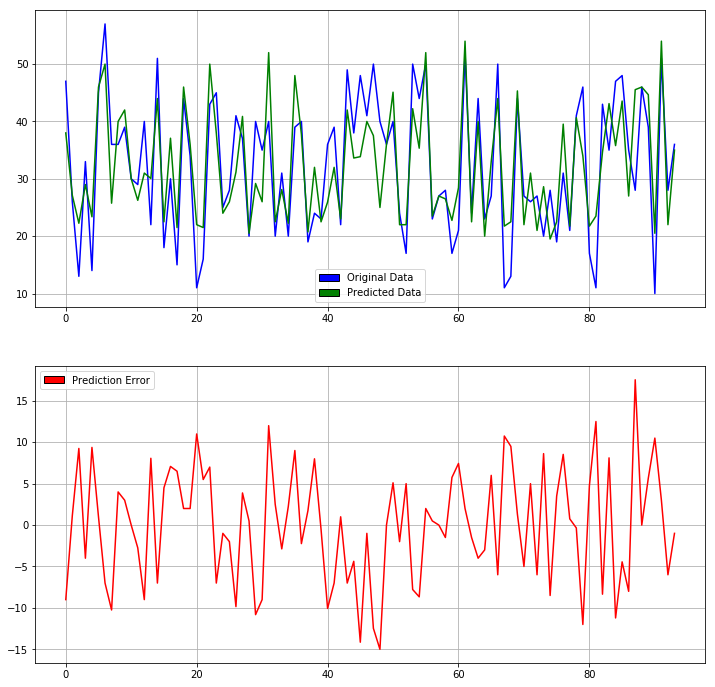

In [18]:
visualize.plot_model(X_test,y_test,clf.best_estimator_)

In [19]:
print "Score for test data : ",clf.best_estimator_.score(X_test,y_test)
print "Score for training data : ",clf.best_estimator_.score(X_train,y_train)

print "Mean absolute error of prediction : ",mean_absolute_error(y_test,clf.best_estimator_.predict(X_test))
print "Mean square error of prediction : ",mean_squared_error(y_test,clf.best_estimator_.predict(X_test))
print "Mean square deviation of prediction : ",math.sqrt(mean_squared_error(y_test,clf.best_estimator_.predict(X_test)))

Score for test data :  0.656517565223
Score for training data :  0.560474386433
Mean absolute error of prediction :  5.70967253472
Mean square error of prediction :  48.2490973422
Mean square deviation of prediction :  6.94615701969


There is a slight improvement, and we can see that both visually and also from the error score.

# A full days prediction

In the above examples, we took a days data and split it randomly into a training and testing set. The model then predicted the test set with reasonable accuracy.

Lets so something different - lets train the model with a full day's data and then try to predict a full day's data using that.

In [20]:
DATE1='20170628'
df1=taxis.getdf_loc_date(DBNAME,DATE1,lat,lon)

X1 = np.array(df['Point'])
y1 = np.array(df['TaxiCount'])
X1=X1.reshape(-1,1)
y1=y1.reshape(-1,1)

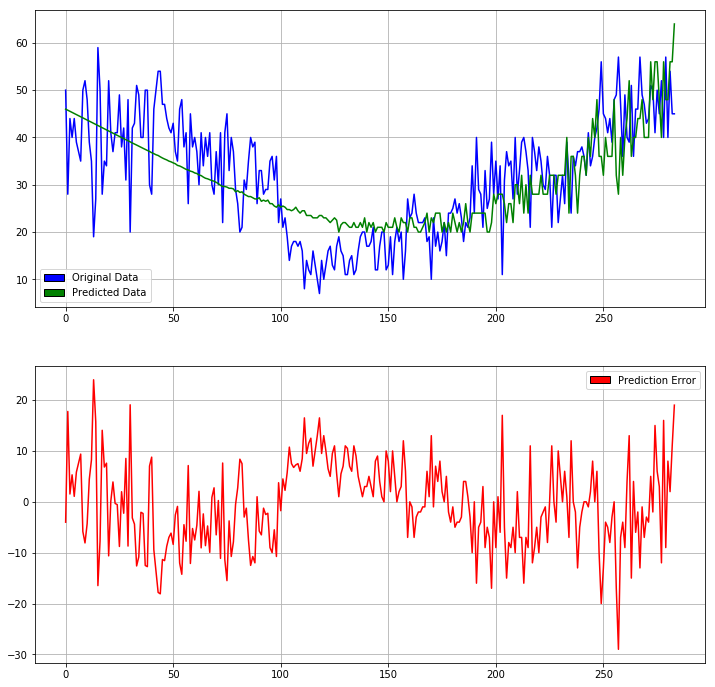

In [21]:
model1 = KernelRidge(alpha=1.0,kernel='poly')
#train with the data for 27th June
model1.fit(X, y)
#test with the data for 28th June
visualize.plot_model(X1,y1,model1)

In [22]:
print "Score for test data : ",model1.score(X1,y1)
print "Score for training data : ",model1.score(X,y)

print "Mean absolute error of prediction : ",mean_absolute_error(y1,model1.predict(X1))
print "Mean square error of prediction : ",mean_squared_error(y1,model.predict(X1))
print "Mean square deviation of prediction : ",math.sqrt(mean_squared_error(y1,model.predict(X1)))

Score for test data :  0.525425436093
Score for training data :  0.525425436093
Mean absolute error of prediction :  6.81162304254
Mean square error of prediction :  67.5746268996
Mean square deviation of prediction :  8.22037875646
